In [5]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests


In [ ]:
#Using the Beautifulsoup library to scrap data from wikipedia
wikipedia_link='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
raw_wikipedia_page= requests.get(wikipedia_link).text

soup = BeautifulSoup(raw_wikipedia_page,'xml')


In [ ]:
#Creating a Table with the desired columns
table = soup.find('table')

Postcode      = []
Borough       = []
Neighbourhood = []



# extracting clean data from the table
for tr_cell in table.find_all('tr'):
    
    counter = 1
    Postcode_var      = -1
    Borough_var       = -1
    Neighbourhood_var = -1
    
    for td_cell in tr_cell.find_all('td'):
        if counter == 1: 
            Postcode_var = td_cell.text
        if counter == 2: 
            Borough_var = td_cell.text
            tag_a_Borough = td_cell.find('a')
            
        if counter == 3: 
            Neighbourhood_var = str(td_cell.text).strip()
            tag_a_Neighbourhood = td_cell.find('a')
            
        counter +=1
        
    if (Postcode_var == 'Not assigned' or Borough_var == 'Not assigned' or Neighbourhood_var == 'Not assigned'): 
        continue
    try:
        if ((tag_a_Borough is None) or (tag_a_Neighbourhood is None)):
            continue
    except:
        pass
    if(Postcode_var == -1 or Borough_var == -1 or Neighbourhood_var == -1):
        continue
        #Appending Data to the table
    Postcode.append(Postcode_var)
    Borough.append(Borough_var)
    Neighbourhood.append(Neighbourhood_var)

In [ ]:
unique_p = set(Postcode)
Postcode_u      = []
Borough_u       = []
Neighbourhood_u = []


for postcode_unique_element in unique_p:
    p_var = ''; b_var = ''; n_var = ''; 
    for postcode_idx, postcode_element in enumerate(Postcode):
        if postcode_unique_element == postcode_element:
            p_var = postcode_element;
            b_var = Borough[postcode_idx]
            if n_var == '': 
                n_var = Neighbourhood[postcode_idx]
            else:
                n_var = n_var + ', ' + Neighbourhood[postcode_idx]
    Postcode_u.append(p_var)
    Borough_u.append(b_var)
    Neighbourhood_u.append(n_var)

In [ ]:
#creating a Dict in orded to put the data in it
toronto_dict = {'Postcode':Postcode_u, 'Borough':Borough_u, 'Neighbourhood':Neighbourhood_u}
#transforming the Dict to a Data Frame
df_toronto = pd.DataFrame.from_dict(toronto_dict)
df_toronto.to_csv('toronto_part1.csv')
df_toronto.head(10)

In [ ]:
# the Shape of the data frame
df_toronto.shape

In [15]:
!pip install geocoder

In [ ]:
import geocoder # import geocoder

latitude = []
longitude = []
# initialize your variable to None
for elem in Postcode_u:
    lat_lng_coords = None

# loop until you get the coordinates
    while (lat_lng_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(elem))
        lat_lng_coords = g.latlng
        # print(lat_lng_coords)

    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])
    #Getting the longitude and the latitude
   


In [ ]:
toronto_dict = {'Postcode':Postcode_u, 'Borough':Borough_u, 'Neighbourhood':Neighbourhood_u,
              'Latitude': latitude, 'Longitude':longitude}
df_toronto = pd.DataFrame.from_dict(toronto_dict)
df_toronto.to_csv('toronto_base.csv')
df_toronto.head(10)
#Displaying the Toronto data frame with latitude and longitude

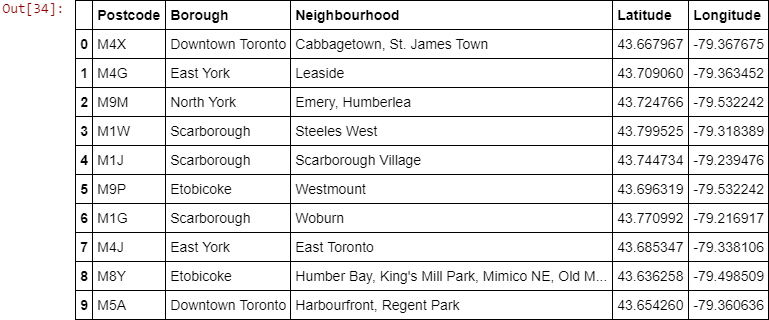